<a href="https://colab.research.google.com/github/Sathyadev75/Customer-conversion-prediction/blob/main/CUSTOMER_INSURANCE%2BPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""Guvi Datathon 1.0
Customer Conversion Prediction
Problem Statement
You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.
Data
The historical sales data is available as a compressed file here.
Data
Features:
● age (numeric)
● job : type of job
● marital : marital status
● educational_qual : education status
● call_type : contact communication type
● day: last contact day of the month (numeric)
● mon: last contact month of year
● dur: last contact duration, in seconds (numeric)
● num_calls: number of contacts performed during this
campaign and for this client
● prev_outcome: outcome of the previous marketing
campaign (categorical:
"unknown","other","failure","success")
Output variable (desired target):
● y - has the client subscribed to the insurance?
Minimum Requirements
It is not sufficient to just fit a model - the model must be
analysed to find the important factors that contribute towards
the price. AUROC must be used as a metric to evaluate the
performance of the models"""

In [322]:
#required packages

import pandas as pd
import numpy as np
import statistics as st


import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [324]:
#IMPORTNG DATAFRAME

df=pd.read_csv("/content/drive/MyDrive/DATA SCIENCE PROJECTS/CUSTOMER INSURANCE PREDICTION/Customer Conversion Prediction - Customer Conversion Prediction.csv")

df1=df.head(40)
df1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [325]:
#checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [326]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
dur,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
num_calls,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


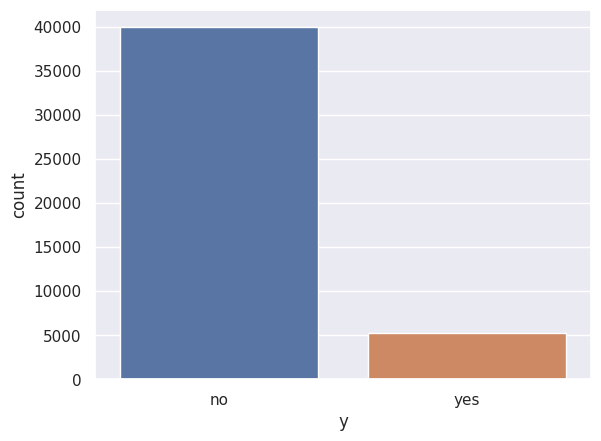

In [327]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='y')
plt.show()

**DATA CLEANING**

In [328]:
df1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [329]:
#classification problem

print(df.shape)
print(f'➤ The DataFrame(df) contains {df.shape[0]} rows and {df.shape[1]} columns.')


df.columns


(45211, 11)
➤ The DataFrame(df) contains 45211 rows and 11 columns.


Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [330]:
list_columns=df.columns
for column in list_columns:
  print(df[column].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939


since null values are present in string form "unknown" we need to replace it to null values and then filled not to loose th huge amount of values

In [331]:
df.columns
#converting unknown values to None in which it will able to filled by numpy

df["prev_outcome"]=df["prev_outcome"].replace({"unknown":None})

df["job"]=df["job"].replace({"unknown":None})

df["education_qual"]=df["education_qual"].replace({"unknown":None})

df["call_type"]=df["call_type"].replace({"unknown":None})



In [332]:
df.isnull().sum()



age                   0
job                 288
marital               0
education_qual     1857
call_type         13020
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36959
y                     0
dtype: int64

In [333]:
#filling missing values using most frquent values in respective columns



df["job"]=df["job"].replace({None:st.mode(df["job"])})

df["education_qual"]=df["education_qual"].replace({None:st.mode(df["education_qual"])})

df["call_type"]=df["call_type"].replace({None:st.mode(df["call_type"])})


#st.mode(df["prev_outcome"])    #since mode is None we select other than this

print(df["prev_outcome"].value_counts())  #most occuriing element is elected other than None

#from the count we get "failure" is most occured one  4901

df["prev_outcome"]=df["prev_outcome"].replace({None:"failure"})



failure    4901
other      1840
success    1511
Name: prev_outcome, dtype: int64


In [334]:
list=df.columns


In [335]:
for column in list:
  print(df[column].unique())

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'primary']
['cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[ 261  151   76 ... 1298 1246 1556]
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
['failure' 'other' 'success']
['no' 'yes']


In [336]:
df["dur"].describe()

good=[i for i in range(0,107)]
better=[i for i in range(107,181)]
best=[i for i in range(181,310)]

dur=df["dur"].to_list()
duration_factor=[]
for i in dur:
  if i in good:
    duration_factor.append("good")
  elif i in better:
    duration_factor.append("better")
  elif i in best:
    duration_factor.append("best")
  elif i>311:
    duration_factor.append("excellent")
  else:
    duration_factor.append(None)
df["duration_factor"]=duration_factor

In [337]:
date=[]
temp_df=pd.DataFrame({})
temp_df["day"]=df["day"].astype(str)
temp_df["mon"]=df["mon"].astype(str)
print(temp_df["mon"].unique())

month={"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}



x=[i for i in range(1,32)]
y=[i for i in range(1,30)]
z=[i for i in range(1,31)]


months=[]


def validate():
       x=temp_df["day"]
       y=temp_df["mon"]
       month_data={"jan":x,"feb":y,"mar":x,"apr":z,"may":x,"jun":z,"jul":x,"aug":z,"sep":x,"oct":z,"nov":x,"dec":z}
       for i in range(len(temp_df["day"].to_list())):
           month_x=temp_df["mon"][i]
           day_x=temp_df["day"][i]
           if day_x in month_data:
                temp_df["day_y"]=day_x
                temp_df["month_y"]=month_x

       print(temp_df)


validate()

#change_month()
#print(temp_df)



['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
      day  mon
0       5  may
1       5  may
2       5  may
3       5  may
4       5  may
...    ..  ...
45206  17  nov
45207  17  nov
45208  17  nov
45209  17  nov
45210  17  nov

[45211 rows x 2 columns]


**verification of null value presence**

In [338]:
df.isnull().sum()



age                 0
job                 0
marital             0
education_qual      0
call_type           0
day                 0
mon                 0
dur                 0
num_calls           0
prev_outcome        0
y                   0
duration_factor    91
dtype: int64

In [339]:
df=df.drop_duplicates()


In [340]:
df.dtypes

age                 int64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur                 int64
num_calls           int64
prev_outcome       object
y                  object
duration_factor    object
dtype: object

FEATURE ENGINEERING

##DATA VISUALIZATION

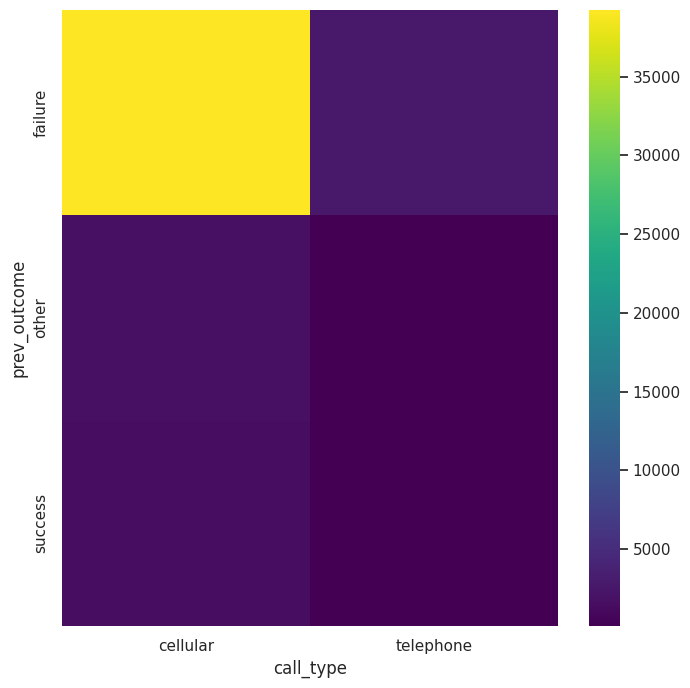

In [341]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['prev_outcome'].value_counts()
    for x_label, grp in df.groupby('call_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('call_type')
_ = plt.ylabel('prev_outcome')

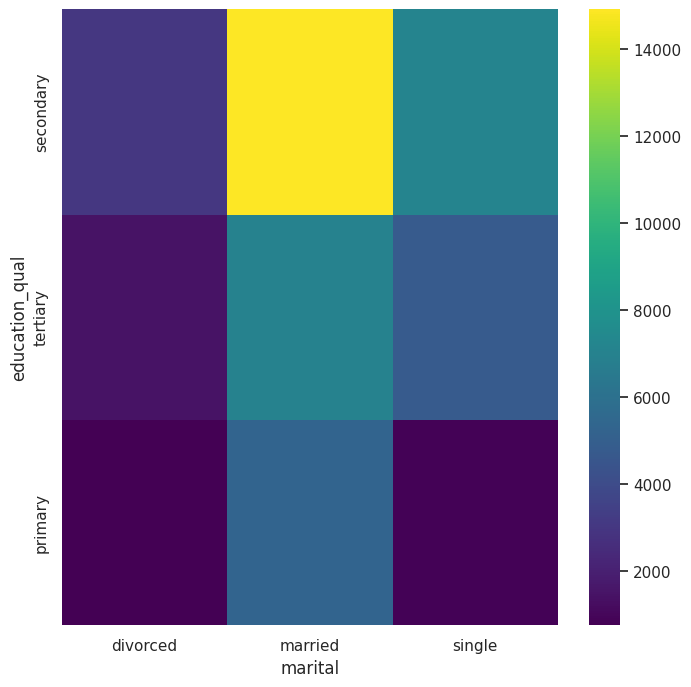

In [342]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education_qual'].value_counts()
    for x_label, grp in df.groupby('marital')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital')
_ = plt.ylabel('education_qual')

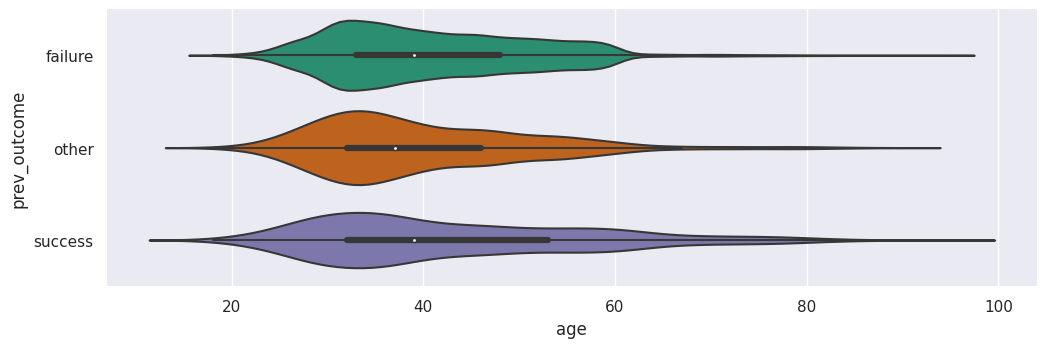

In [343]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['prev_outcome'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='prev_outcome', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

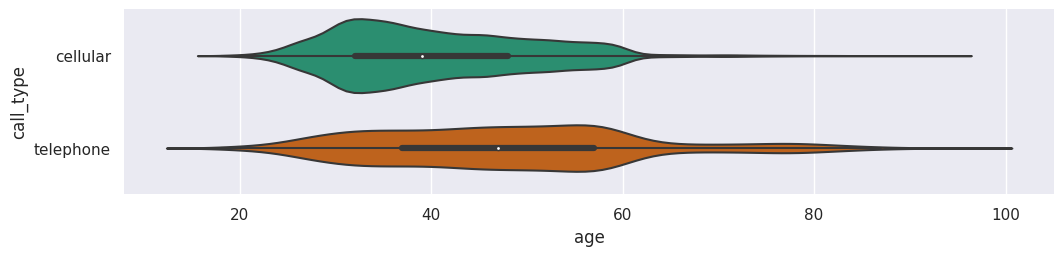

In [344]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['call_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='call_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

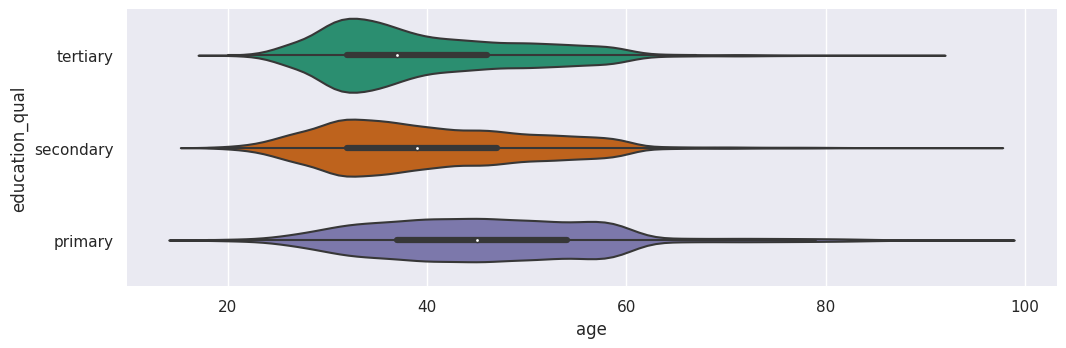

In [345]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['education_qual'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='education_qual', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

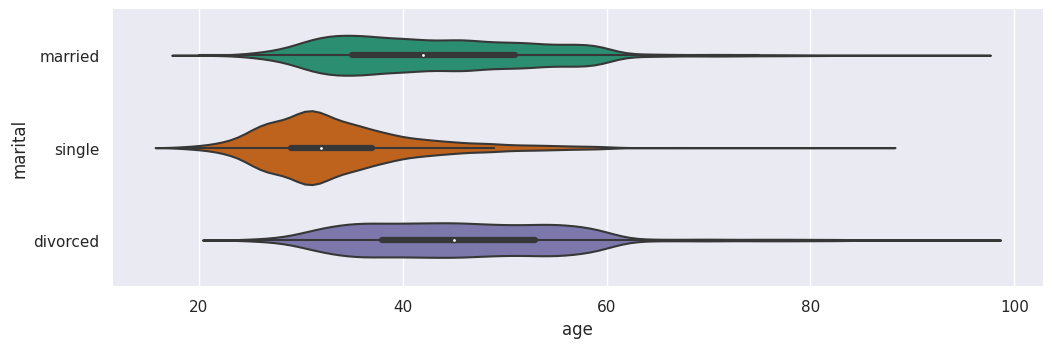

In [346]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['marital'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='marital', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

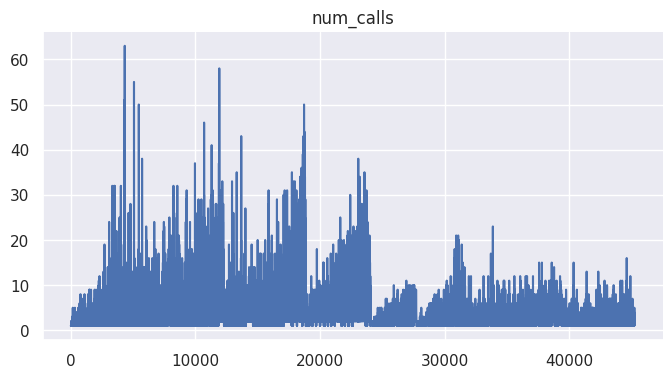

In [347]:
from matplotlib import pyplot as plt
df['num_calls'].plot(kind='line', figsize=(8, 4), title='num_calls')
plt.gca().spines[['top', 'right']].set_visible(False)

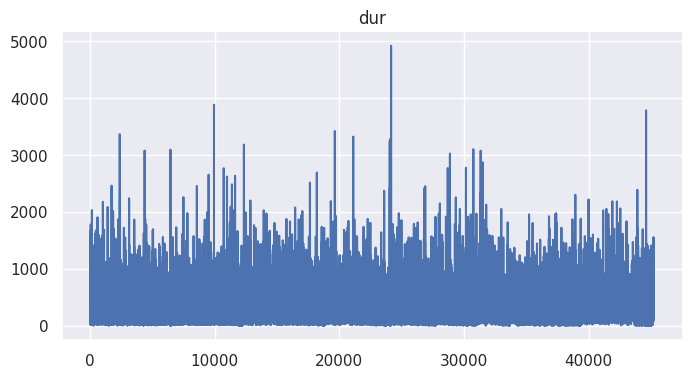

In [348]:
from matplotlib import pyplot as plt
df['dur'].plot(kind='line', figsize=(8, 4), title='dur')
plt.gca().spines[['top', 'right']].set_visible(False)

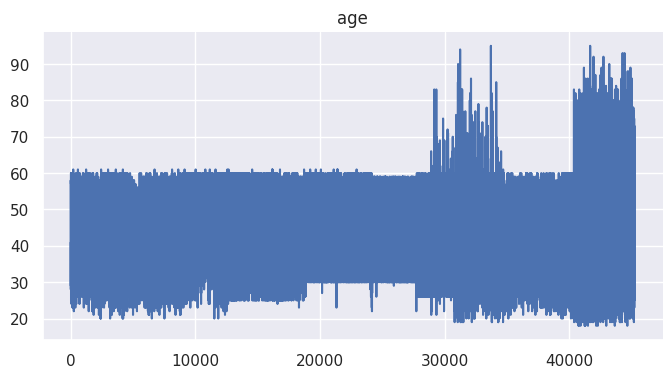

In [349]:
from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

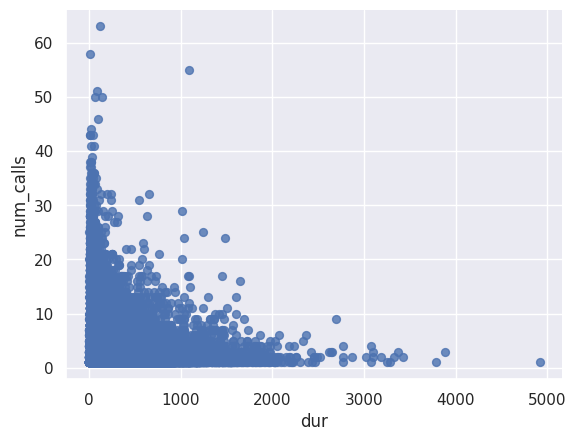

In [350]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='dur', y='num_calls', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

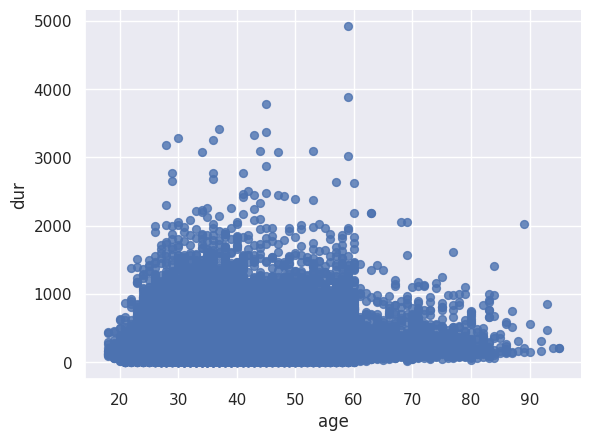

In [351]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='dur', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

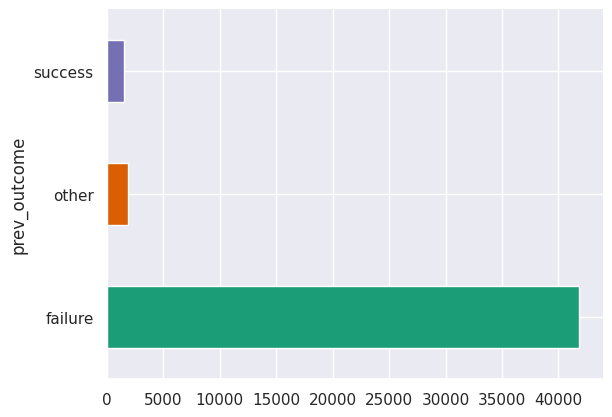

In [352]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('prev_outcome').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

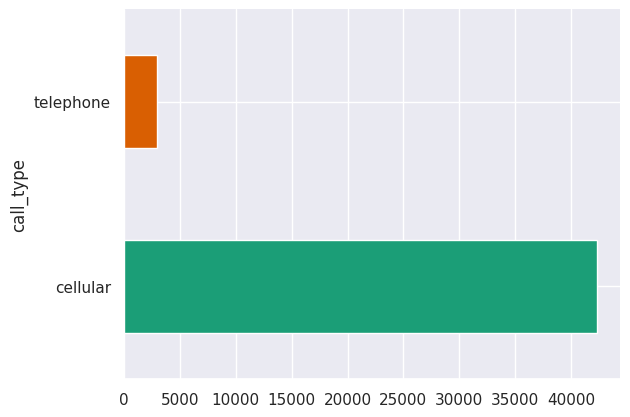

In [353]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('call_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

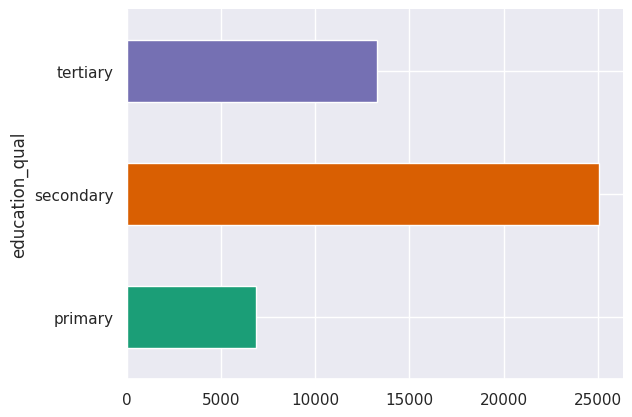

In [354]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('education_qual').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

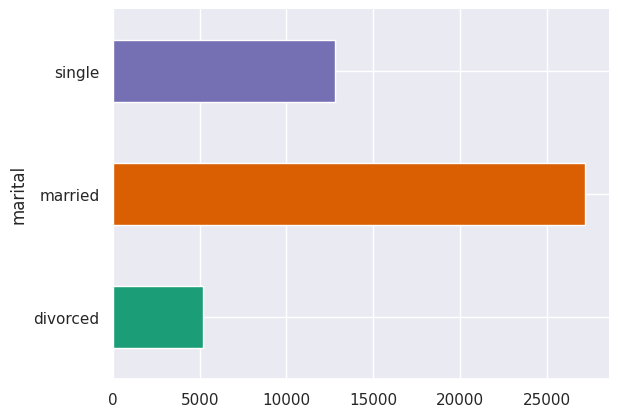

In [355]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

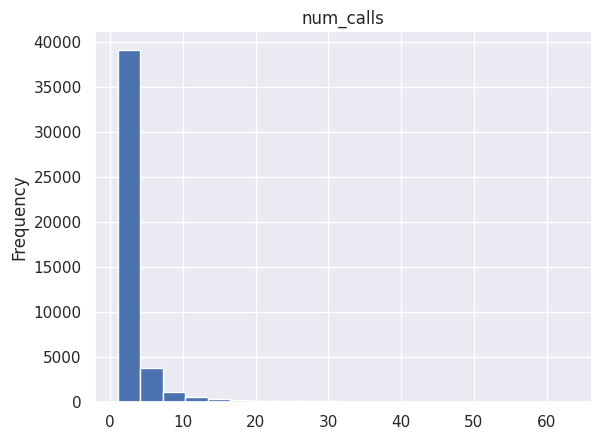

In [356]:
from matplotlib import pyplot as plt
df['num_calls'].plot(kind='hist', bins=20, title='num_calls')
plt.gca().spines[['top', 'right',]].set_visible(False)

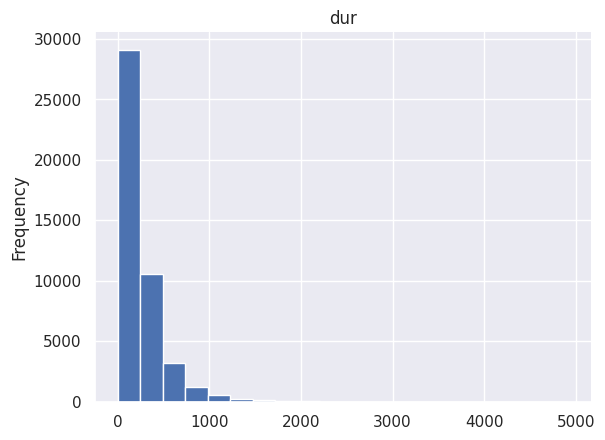

In [357]:
from matplotlib import pyplot as plt
df['dur'].plot(kind='hist', bins=20, title='dur')
plt.gca().spines[['top', 'right',]].set_visible(False)

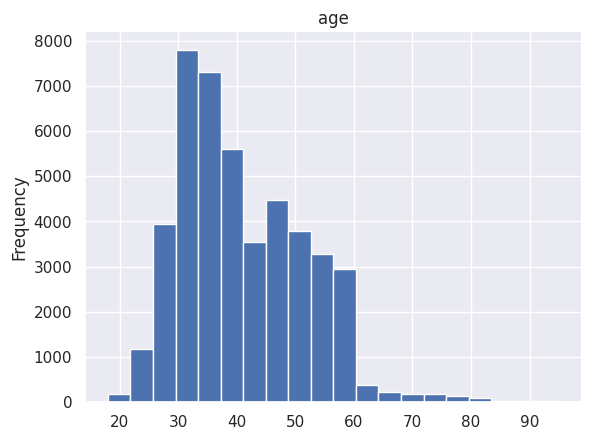

In [358]:
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [359]:

df["day"]=df["day"].astype(str)

In [360]:
list_cat_vars=[column for column in df.columns if df[column].dtype==object]
print("categorical_columns: \n",list_cat_vars)


categorical_columns: 
 ['job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'prev_outcome', 'y', 'duration_factor']


In [361]:
for i in list_cat_vars:
  print(type(i))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [362]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'duration_factor'],
      dtype='object')

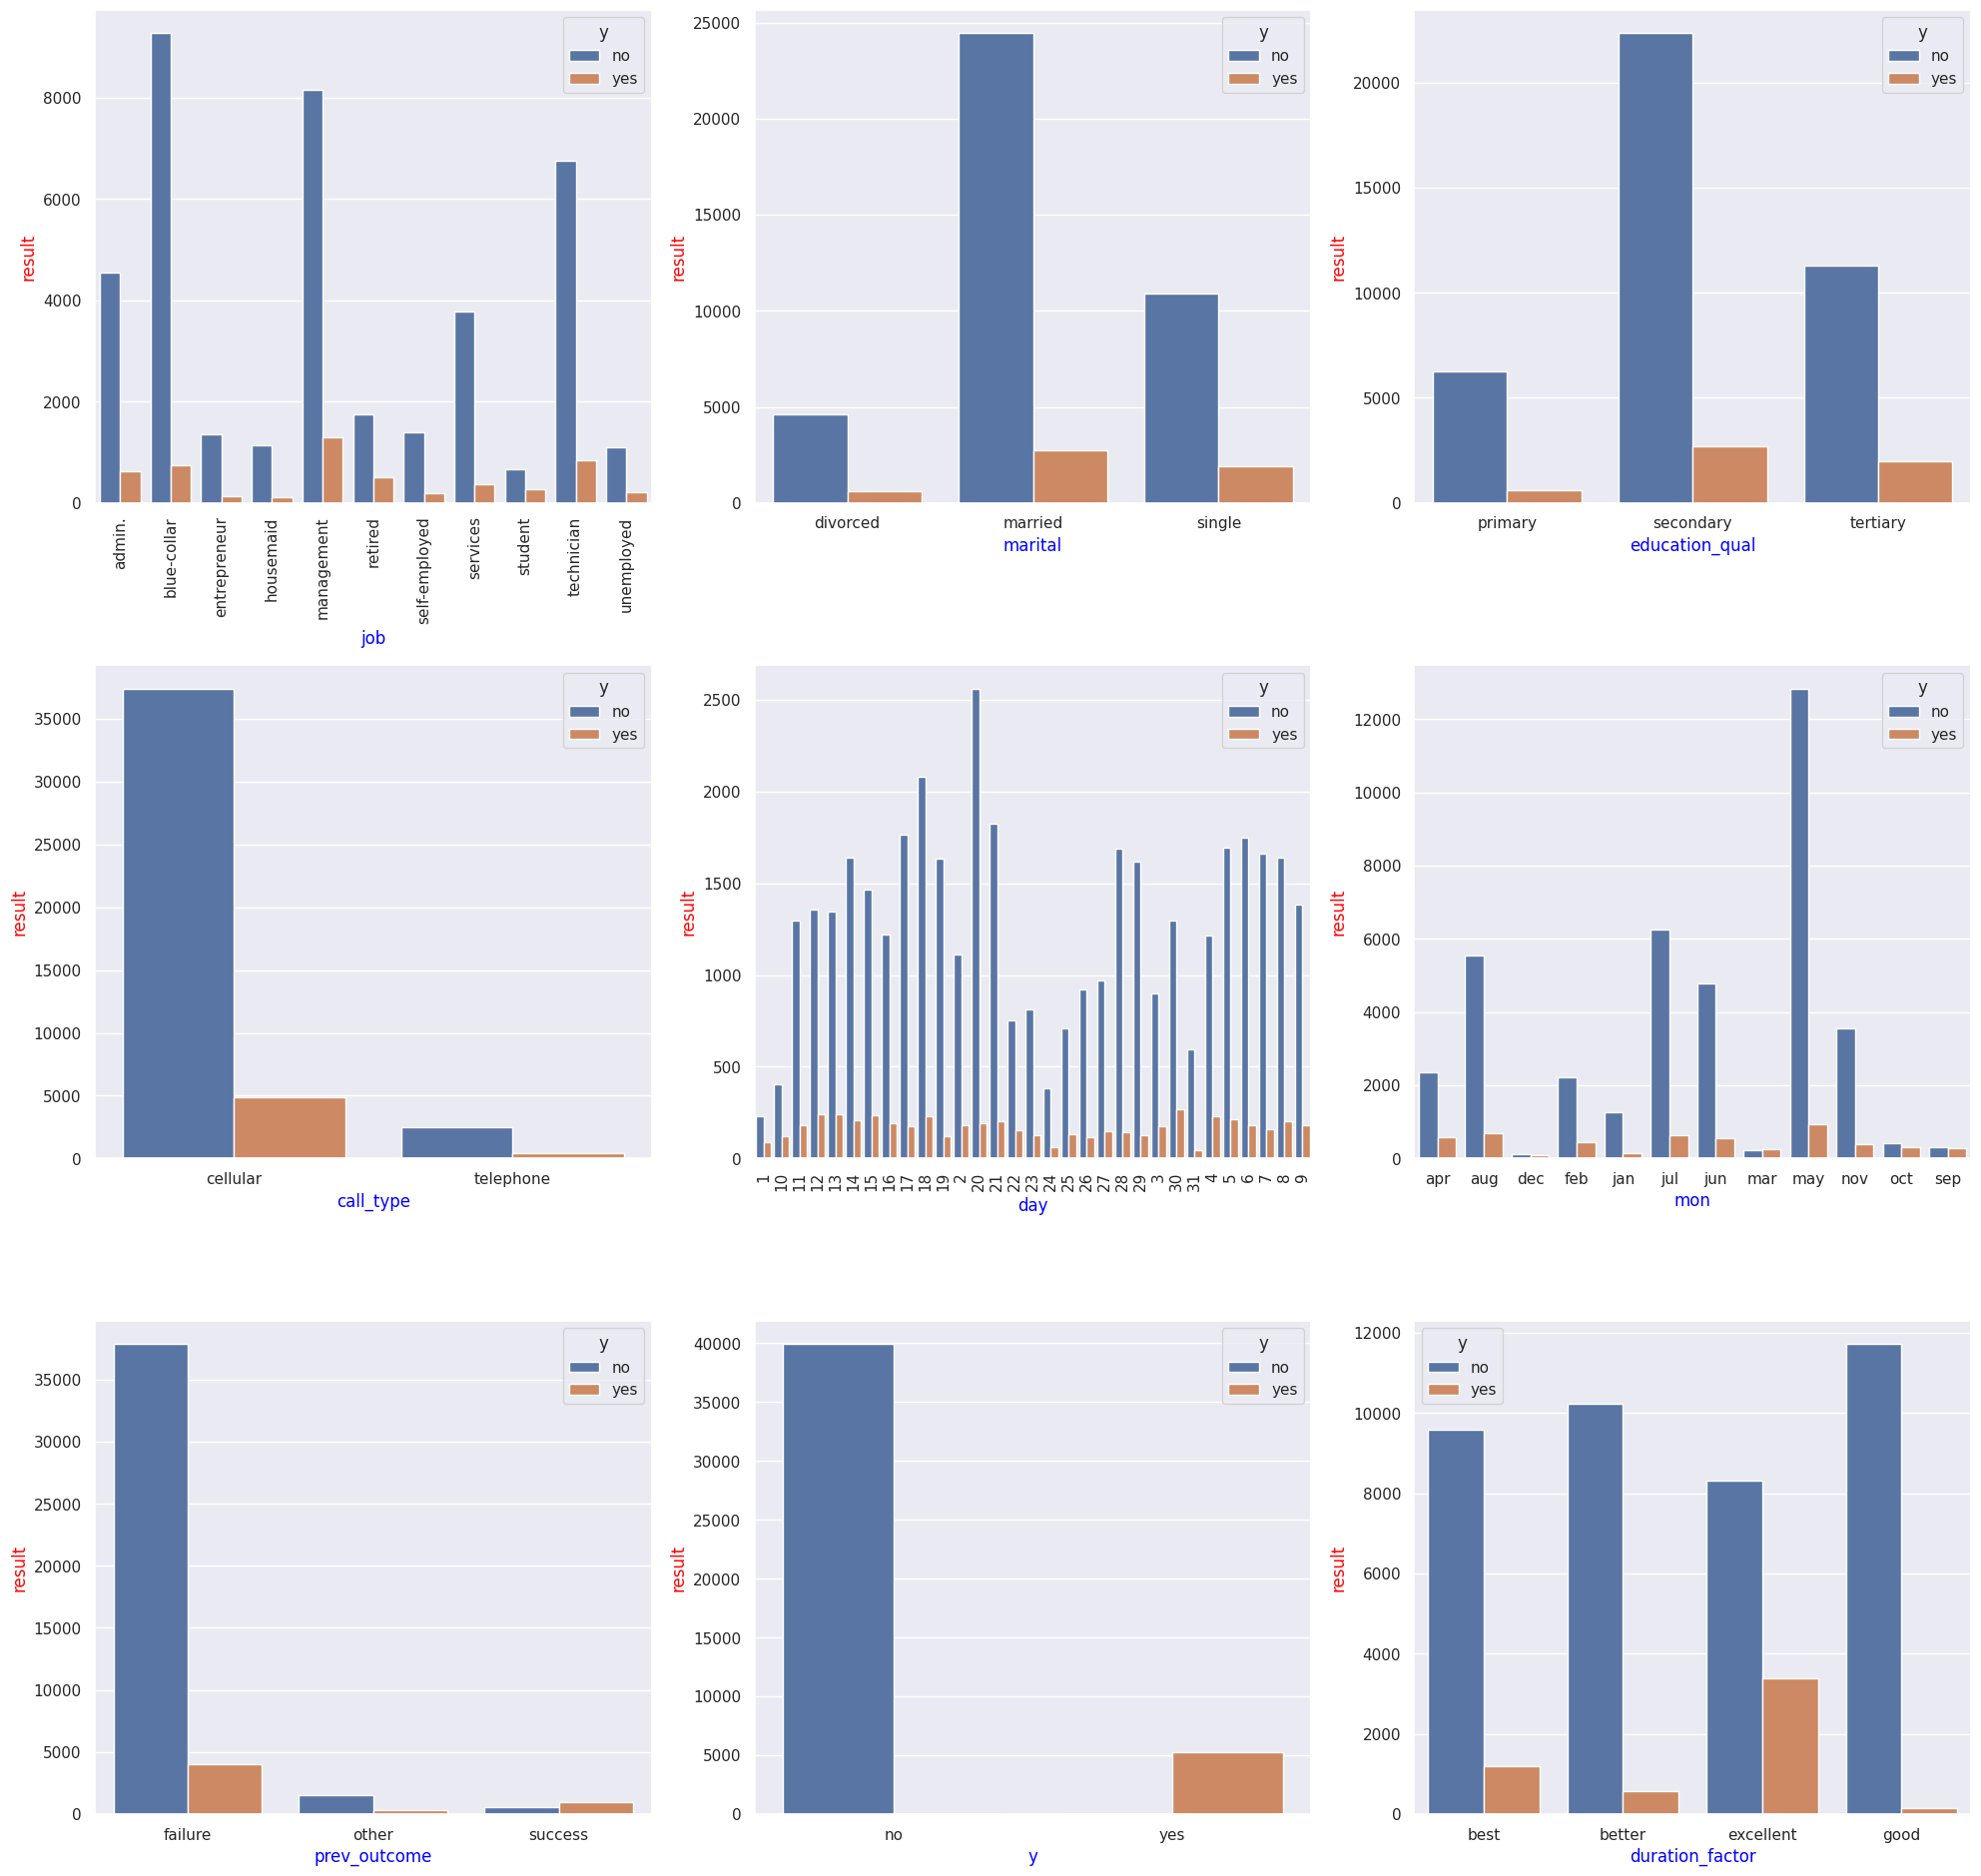

In [363]:

plots=431
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))
#list_cat_vars.remove("y")

for cat_column in list_cat_vars:

      plt.subplot(plots)
      sns.set(style="darkgrid")
      df.sort_values(cat_column,ascending=True,inplace=True)
      sns.countplot(x=cat_column,hue="y",data=df)
      plt.xlabel(cat_column, color="blue")
      plt.ylabel("result", color="red")
      plots+=1
      if cat_column=="day":
          plt.xticks(rotation=90)
      if cat_column=="num_calls":
          plt.xlim(0,4)
      if cat_column=="job":
          plt.xticks(rotation=90)

      if plots==440:
        break
plt.tight_layout()
plt.show()



In [364]:
df.corr()

<ipython-input-364-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,dur,num_calls
age,1.000000,-0.004739,0.004705
dur,-0.004739,1.000000,-0.084607
num_calls,0.004705,-0.084607,1.000000


from the plots we can understand that change in categorical variable has some amount of impact on target variable

CONTINOUS VARIABLE VS TARGET VARIABLE

In [365]:
#LIST OF CONTINOUS COLUMNS

list_con_vars=[column for column in df.columns if df[column].dtype=="int64"]
print(list_con_vars)

['age', 'dur', 'num_calls']


FEATURE ENGINEERING

In [366]:
df.describe()

,age,dur,num_calls
count,45200.000000,45200.000000,45200.000000
mean,40.938053,258.195066,2.764071
std,10.619305,257.549517,3.098314
min,18.000000,0.000000,1.000000
25%,33.000000,103.000000,1.000000
50%,39.000000,180.000000,2.000000
75%,48.000000,319.000000,3.000000
max,95.000000,4918.000000,63.000000


**REMOVING OUTLIERS**

In [367]:
list_con_vars

['age', 'dur', 'num_calls']

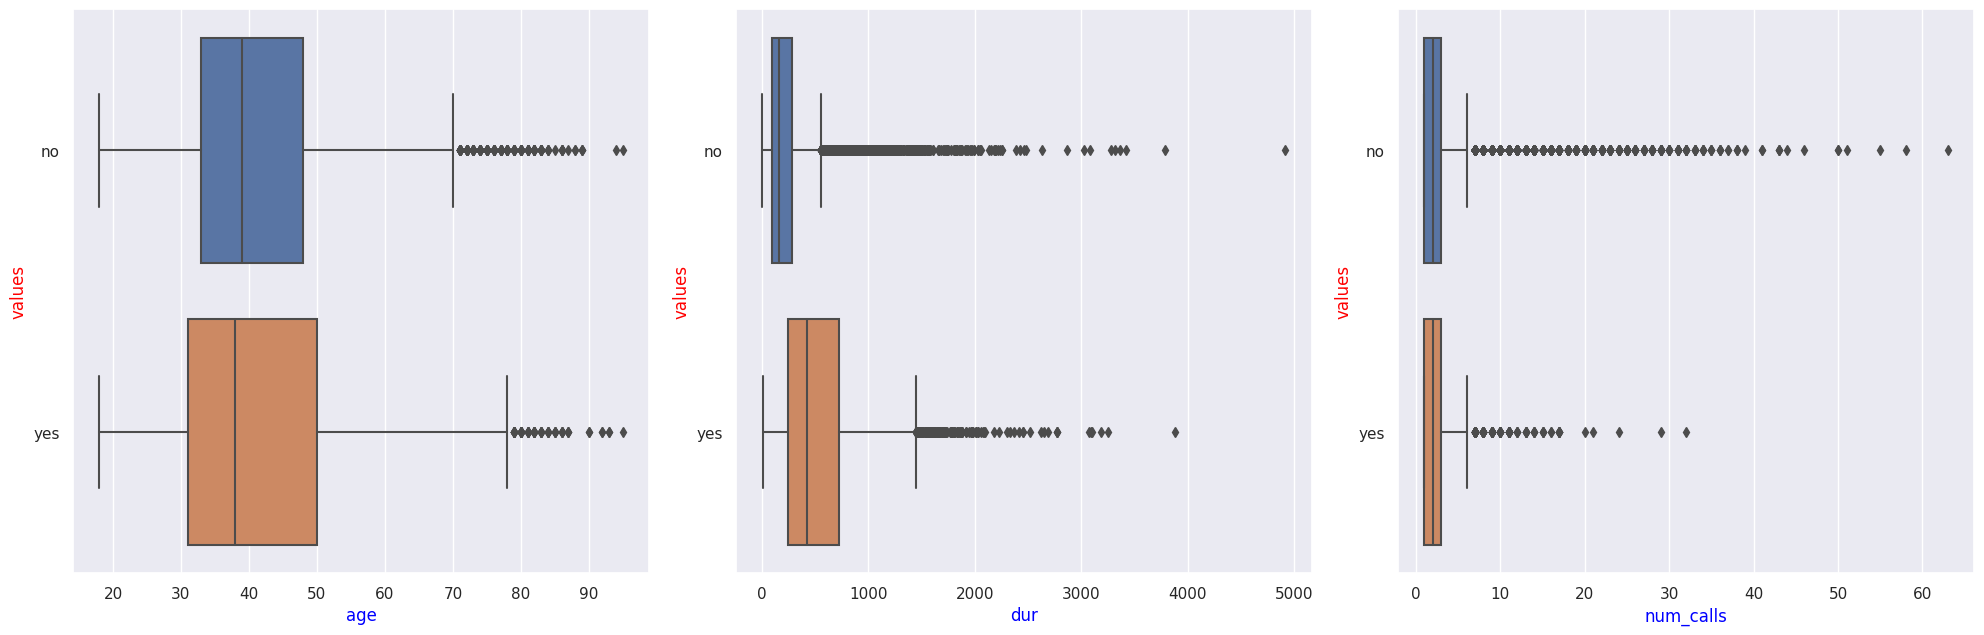

In [368]:
#job,marital,education_qual,call_type,prev_outcome mon
#list_cat_vars

#for categorical columns
from scipy.stats import stats
plots=431
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))

con_col_vars=["age","dur","num_calls"]
for cat_column in con_col_vars:

      plt.subplot(plots)
      sns.set(style="darkgrid")
      sns.boxplot(x=cat_column, y="y", data=df)
      plt.xlabel(cat_column, color="blue")
      plt.ylabel("values", color="red")
      plots+=1


plt.tight_layout()
plt.show()



##AFTER REMOVING OUTLIERS

<ipython-input-369-013f881b6e80>:8: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  df["z_score"]=stats.zscore(df[cat_column])
<ipython-input-369-013f881b6e80>:8: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  df["z_score"]=stats.zscore(df[cat_column])
<ipython-input-369-013f881b6e80>:8: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  df["z_score"]=stats.zscore(df[cat_column])


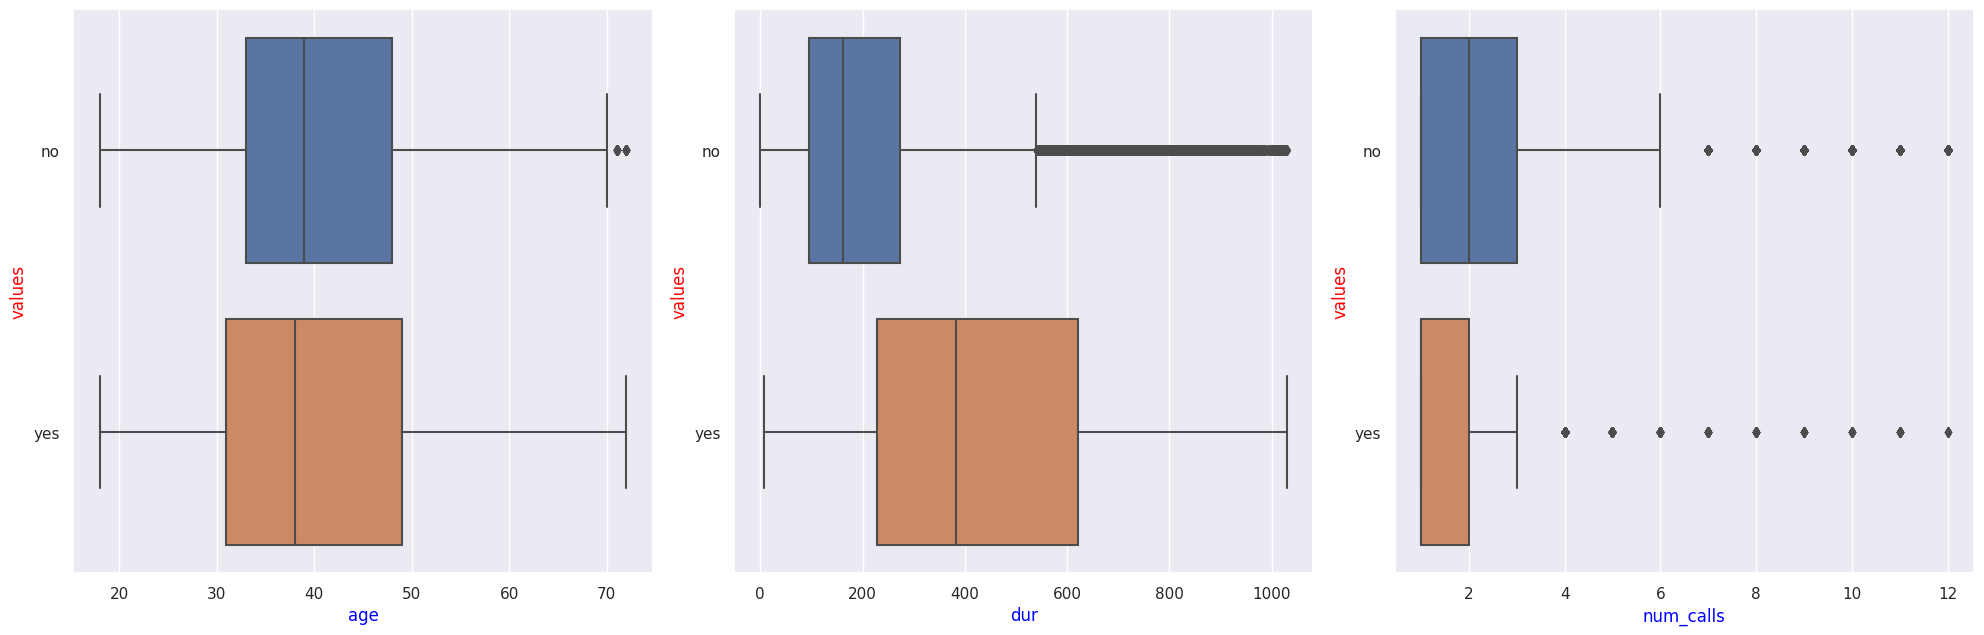

In [369]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))

for cat_column in con_col_vars:

      plt.subplot(plots)
      sns.set(style="darkgrid")
      df["z_score"]=stats.zscore(df[cat_column])
      df=df[df["z_score"]>-3]
      df=df[df["z_score"]<3]
      sns.boxplot(x=cat_column, y="y", data=df)
      plt.xlabel(cat_column, color="blue")
      plt.ylabel("values", color="red")
      plots+=1


plt.tight_layout()
plt.show()



the plots indicates that


In [370]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43036.0,40.634562,10.092204,18.000000,33.000000,39.000000,48.000000,72.000000
dur,43036.0,235.385817,190.210761,0.000000,103.000000,178.000000,306.000000,1030.000000
num_calls,43036.0,2.455828,1.944334,1.000000,1.000000,2.000000,3.000000,12.000000
z_score,43036.0,-0.100854,0.625588,-0.569265,-0.569265,-0.247516,0.074233,2.969975


In [371]:
for i in df.columns:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "age" is divided into "55" categories.
Column "job" is divided into "11" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "3" categories.
Column "call_type" is divided into "2" categories.
Column "day" is divided into "31" categories.
Column "mon" is divided into "12" categories.
Column "dur" is divided into "1027" categories.
Column "num_calls" is divided into "12" categories.
Column "prev_outcome" is divided into "3" categories.
Column "y" is divided into "2" categories.
Column "duration_factor" is divided into "4" categories.
Column "z_score" is divided into "12" categories.


In [372]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# List of categorical columns
categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y', 'day', 'duration_factor']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding for each categorical column
for col in categorical_columns:
    df[col + '_encoded'] = le.fit_transform(df[col])


# Drop the original categorical columns
df.drop(columns=categorical_columns, inplace=True)


In [373]:
df=df[['age', 'dur', 'num_calls', 'job_encoded', 'marital_encoded',
       'education_qual_encoded', 'call_type_encoded', 'mon_encoded',
       'prev_outcome_encoded', 'y_encoded', 'day_encoded',
       'duration_factor_encoded']]

In [374]:
#!pip install xgboost
import xgboost as xgb

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming df is your DataFrame with encoded features and the target variable
# X should contain the features, and y should contain the target variable
X = df.drop(columns=['y_encoded'])
y = df['y_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.91

Confusion Matrix:
[[7589  128]
 [ 676  215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7717
           1       0.63      0.24      0.35       891

    accuracy                           0.91      8608
   macro avg       0.77      0.61      0.65      8608
weighted avg       0.89      0.91      0.89      8608



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [376]:
from sklearn.metrics import roc_auc_score
# Compute AUROC score
auroc = roc_auc_score(y_test, y_pred)

print('AUROC: %.3f' % auroc)


AUROC: 0.612


<Figure size 1000x600 with 0 Axes>

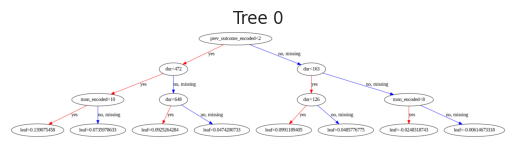

Tree 0, Node 0:
0:[prev_outcome_encoded<2] yes=1,no=2,missing=2
	1:[dur<472] yes=3,no=4,missing=4
		3:[mon_encoded<10] yes=7,no=8,missing=8
			7:leaf=0.139075458
			8:leaf=0.0735978633
		4:[dur<648] yes=9,no=10,missing=10
			9:leaf=0.0925264284
			10:leaf=0.0474200733
	2:[dur<163] yes=5,no=6,missing=6
		5:[dur<126] yes=11,no=12,missing=12
			11:leaf=0.0991189405
			12:leaf=0.0485776775
		6:[mon_encoded<8] yes=13,no=14,missing=14
			13:leaf=-0.0248318743
			14:leaf=-0.00614673318



<Figure size 1000x600 with 0 Axes>

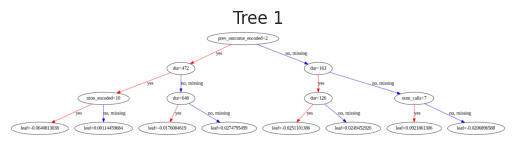

Tree 1, Node 0:
0:[prev_outcome_encoded<2] yes=1,no=2,missing=2
	1:[dur<472] yes=3,no=4,missing=4
		3:[mon_encoded<10] yes=7,no=8,missing=8
			7:leaf=0.139075458
			8:leaf=0.0735978633
		4:[dur<648] yes=9,no=10,missing=10
			9:leaf=0.0925264284
			10:leaf=0.0474200733
	2:[dur<163] yes=5,no=6,missing=6
		5:[dur<126] yes=11,no=12,missing=12
			11:leaf=0.0991189405
			12:leaf=0.0485776775
		6:[mon_encoded<8] yes=13,no=14,missing=14
			13:leaf=-0.0248318743
			14:leaf=-0.00614673318



<Figure size 1000x600 with 0 Axes>

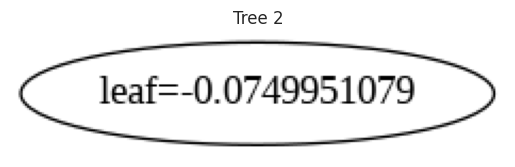

Tree 2, Node 0:
0:[prev_outcome_encoded<2] yes=1,no=2,missing=2
	1:[dur<472] yes=3,no=4,missing=4
		3:[mon_encoded<10] yes=7,no=8,missing=8
			7:leaf=0.139075458
			8:leaf=0.0735978633
		4:[dur<648] yes=9,no=10,missing=10
			9:leaf=0.0925264284
			10:leaf=0.0474200733
	2:[dur<163] yes=5,no=6,missing=6
		5:[dur<126] yes=11,no=12,missing=12
			11:leaf=0.0991189405
			12:leaf=0.0485776775
		6:[mon_encoded<8] yes=13,no=14,missing=14
			13:leaf=-0.0248318743
			14:leaf=-0.00614673318



<Figure size 1000x600 with 0 Axes>

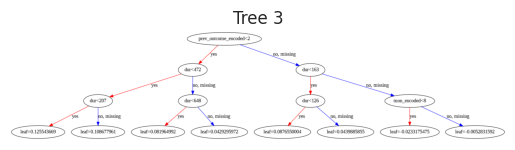

Tree 3, Node 0:
0:[prev_outcome_encoded<2] yes=1,no=2,missing=2
	1:[dur<472] yes=3,no=4,missing=4
		3:[mon_encoded<10] yes=7,no=8,missing=8
			7:leaf=0.139075458
			8:leaf=0.0735978633
		4:[dur<648] yes=9,no=10,missing=10
			9:leaf=0.0925264284
			10:leaf=0.0474200733
	2:[dur<163] yes=5,no=6,missing=6
		5:[dur<126] yes=11,no=12,missing=12
			11:leaf=0.0991189405
			12:leaf=0.0485776775
		6:[mon_encoded<8] yes=13,no=14,missing=14
			13:leaf=-0.0248318743
			14:leaf=-0.00614673318



<Figure size 1000x600 with 0 Axes>

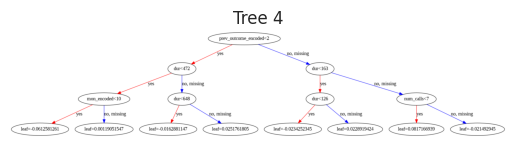

Tree 4, Node 0:
0:[prev_outcome_encoded<2] yes=1,no=2,missing=2
	1:[dur<472] yes=3,no=4,missing=4
		3:[mon_encoded<10] yes=7,no=8,missing=8
			7:leaf=0.139075458
			8:leaf=0.0735978633
		4:[dur<648] yes=9,no=10,missing=10
			9:leaf=0.0925264284
			10:leaf=0.0474200733
	2:[dur<163] yes=5,no=6,missing=6
		5:[dur<126] yes=11,no=12,missing=12
			11:leaf=0.0991189405
			12:leaf=0.0485776775
		6:[mon_encoded<8] yes=13,no=14,missing=14
			13:leaf=-0.0248318743
			14:leaf=-0.00614673318

Accuracy: 0.91

Confusion Matrix:
[[7589  128]
 [ 676  215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7717
           1       0.63      0.24      0.35       891

    accuracy                           0.91      8608
   macro avg       0.77      0.61      0.65      8608
weighted avg       0.89      0.91      0.89      8608



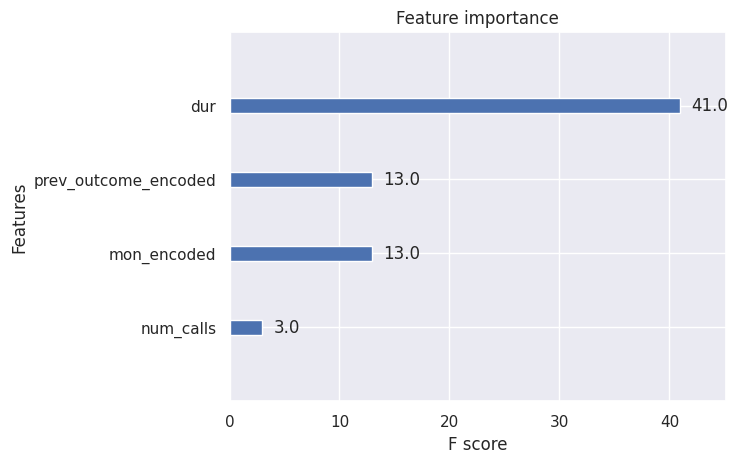

In [377]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Define your data and create a DMatrix (XGBoost-specific data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define hyperparameters for XGBoost
params = {
    'objective': 'multi:softprob',  # Use 'multi:softprob' for multi-class classification
    'num_class': 3,  # Number of classes in the target variable
    'max_depth': 3,  # Max tree depth
    'eta': 0.1,  # Learning rate
    'verbosity': 1  # To print tree information
}

# Train the XGBoost model
num_round = 5  # You can change this number
model = xgb.train(params, dtrain, num_round)

# Plot and print information for each tree
for i in range(num_round):
    plt.figure(figsize=(10, 6))
    xgb.plot_tree(model, num_trees=i)
    plt.title(f"Tree {i}")
    plt.show()

    # Print tree statistics (similarity, weight, gain)
    tree_info = model.get_dump(fmap='')
    for j, tree in enumerate(tree_info):
        print(f"Tree {i}, Node {j}:")
        print(tree)
        break
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot feature importance chart
xgb.plot_importance(model)
plt.show()

In [378]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=df.drop(columns="y_encoded",axis=1)
y=df["y_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the k-NN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8933550185873605


In [379]:
from sklearn.metrics import roc_auc_score


# Compute AUROC score
auroc = roc_auc_score(y_test, y_pred)

print('AUROC: %.3f' % auroc)


AUROC: 0.577


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Load and split the data
X = df.drop(columns="y_encoded", axis=1)
y = df["y_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred)
    print(f"{name} AUROC Score: {auc_score:.4f}")


Decision Tree AUROC Score: 0.6734
Random Forest AUROC Score: 0.9107


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier


X = df.drop(columns="y_encoded", axis=1)
y = df["y_encoded"]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the model
model = GradientBoostingClassifier()

# Define the hyperparameters to search
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.1, 0.05, 0.01],
    "max_depth": [3, 5, 7]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict_proba(X_test)[:, 1]

# Compute AUROC score
auroc = roc_auc_score(y_test, y_pred)

print("Best model:", best_model)
print("AUROC score:", auroc)



In [ ]:
from lazypredict.Supervised import LazyClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming new_df is your DataFrame with features and target variable
X = new_df.drop(columns="y_encoded", axis=1)
y = new_df["y_encoded"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LazyClassifier
clf = LazyClassifier(predictions=True)
models = clf.fit(X_train, X_test, y_train, y_test)

# Display the performance of various classification models
print(models)


The information gain measures the usefulness or importance of a feature/


column in predicting the target variable.
Higher information gain values indicate that a feature provides more useful information for classification.



"dur" (duration) and "prev_outcome" have the highest information gain values, suggesting they are the most informative features for predicting the target.


"marital" and "education_qual" have relatively low information gain values, indicating they have less predictive power.
